In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [ ]:

# Load the dataset
# In a notebook, you can load the file using pandas directly.
# Example: pd.read_excel("file_path.xlsx") instead of using Streamlit's file uploader
data = pd.read_excel("data1.xlsx")  # Replace with your file path
data


,Date,Branch,Maxtrade_Price,Mintrade_Price,Avg_Price
0,2019-01-01,Sirsi,31000,29000,30000
1,2019-01-01,Siddhapura,32000,30000,31000
2,2019-01-01,Yellapura,28000,26000,27000
3,2019-02-01,Sirsi,31500,29500,30500
4,2019-02-01,Siddhapura,32500,30500,31500
...,...,...,...,...,...
211,2024-11-01,Siddhapura,53500,51500,52500
212,2024-11-01,Yellapura,49000,47000,48000
213,2024-12-01,Sirsi,53000,51000,52000
214,2024-12-01,Siddhapura,54000,52000,53000


<Axes: >

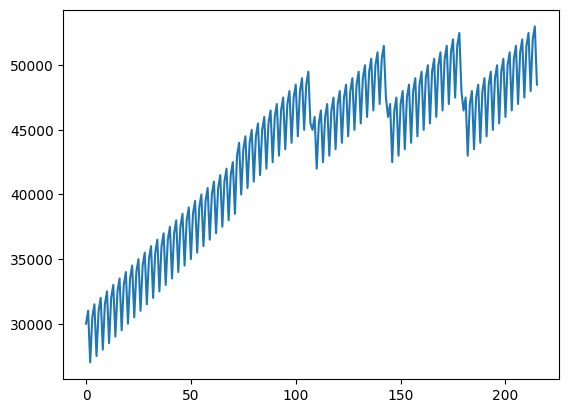

In [14]:
# data.plot()
data["Avg_Price"].plot()

In [5]:
data['Avg_Price'] = pd.to_numeric(data['Avg_Price'], errors='coerce')


In [6]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Assuming 'Avg_Price' is your time series column from a DataFrame named 'data'
time_series_data = data['Avg_Price'].dropna()

# Perform the ADF test
adf_result = adfuller(time_series_data)

# Displaying the test results
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')




ADF Statistic: -1.9181578127539576
p-value: 0.3235679049678525
Critical Values:
   1%: -3.462980134086401
   5%: -2.875885461947131
   10%: -2.5744164898444515


In [7]:
data_diff = data["Avg_Price"].diff().dropna()
data['Avg_Price_log'] = np.log(data['Avg_Price'])
data['Avg_Price_seasonal_diff'] = data['Avg_Price'] - data['Avg_Price'].shift(12) # 12--- Seasonal length


In [27]:
data

,Date,Branch,Maxtrade_Price,Mintrade_Price,Avg_Price,Year,Month,Avg_Price_log,Avg_Price_seasonal_diff
0,2019-01-01,Sirsi,31000,29000,30000,2019,1,10.308953,NaN
1,2019-01-01,Siddhapura,32000,30000,31000,2019,1,10.341742,NaN
2,2019-01-01,Yellapura,28000,26000,27000,2019,1,10.203592,NaN
3,2019-02-01,Sirsi,31500,29500,30500,2019,2,10.325482,NaN
4,2019-02-01,Siddhapura,32500,30500,31500,2019,2,10.357743,NaN
...,...,...,...,...,...,...,...,...,...
211,2024-11-01,Siddhapura,53500,51500,52500,2024,11,10.868568,2000.0
212,2024-11-01,Yellapura,49000,47000,48000,2024,11,10.778956,2000.0
213,2024-12-01,Sirsi,53000,51000,52000,2024,12,10.858999,2000.0
214,2024-12-01,Siddhapura,54000,52000,53000,2024,12,10.878047,2000.0


ADF Statistic: -2.7784079743014085
p-value: 0.06142484137826363
Critical Values:
   1%: -3.465058702600837
   5%: -2.8767942675230356
   10%: -2.5749014492475535


<Axes: >

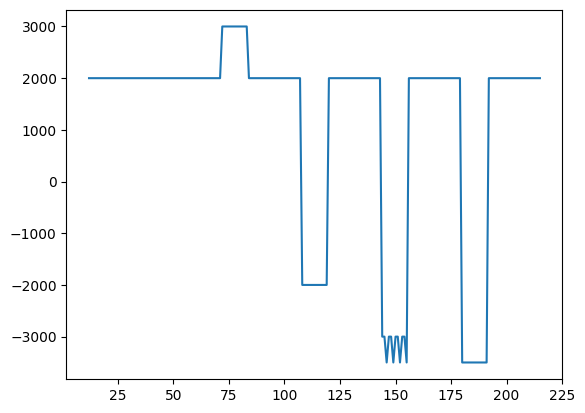

In [12]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Assuming 'Avg_Price' is your time series column from a DataFrame named 'data'
time_series_data = data['Avg_Price_seasonal_diff'].dropna()

# Perform the ADF test
adf_result = adfuller(time_series_data)

# Displaying the test results
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')


data["Avg_Price_seasonal_diff"].plot()

In [1]:

# Ensure 'Date' column is recognized as datetime format
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
    data['Year'] = data['Date'].dt.year
    data['Month'] = data['Date'].dt.month

    # Drop rows with missing 'Year' and 'Avg_Price' values
    data = data.dropna(subset=['Year', 'Avg_Price'])

    # Convert 'Avg_Price' to numeric
    data['Avg_Price'] = pd.to_numeric(data['Avg_Price'], errors='coerce')
    data = data.dropna(subset=['Avg_Price'])

    # Data types overview
    print("Data Types Overview:")
    print(data.dtypes)

    # Check if 'Branch' column exists
    if 'Branch' in data.columns:
        
        # 1. Line Plot - Trend of Avg Price Over Time
        print("Trend of Arecanut Average Prices Over Time")
        plt.figure(figsize=(10, 6))
        sns.lineplot(x='Date', y='Avg_Price', hue='Branch', data=data, palette='Set2')
        plt.title('Trend of Average Prices Over Time')
        plt.xticks(rotation=45)
        plt.show()

        # 2. Box Plot - Distribution of Prices by Branch
        print("Distribution of Average Prices by Branch")
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Branch', y='Avg_Price', data=data, palette='Set3')
        plt.title('Distribution of Average Prices by Branch')
        plt.xticks(rotation=45)
        plt.show()

        # 3. Heatmap - Correlation between numerical variables
        print("Correlation Heatmap of Numerical Features")
        corr = data[['Avg_Price', 'Year', 'Month']].corr()
        plt.figure(figsize=(8, 6))
        sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
        plt.title('Correlation Heatmap')
        plt.show()

        # SARIMA Prediction Parameters
        selected_branch = input("Select Branch from available options: {}".format(data['Branch'].unique()))
        selected_year = int(input("Select Future Year (e.g., 2024): "))
        selected_month = int(input("Select Future Month (1-12): "))

        # Filter data for the selected branch
        branch_data = data[data['Branch'] == selected_branch]

        if not branch_data.empty:
            # Prepare the data for SARIMA
            branch_data.set_index('Date', inplace=True)
            monthly_data = branch_data.resample('M').mean(numeric_only=True)

            # Split data into training and testing sets
            split_point = int(len(monthly_data) * 0.8)  # 80% training, 20% testing
            train_data = monthly_data.iloc[:split_point]
            test_data = monthly_data.iloc[split_point:]

            # Fit the SARIMA model on the training data
            model = SARIMAX(train_data['Avg_Price'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
            results = model.fit()

            # Predict historical test period (previous years)
            pred_start = test_data.index[0]
            pred_end = test_data.index[-1]
            past_predictions = results.get_prediction(start=pred_start, end=pred_end)
            predicted_past_values = past_predictions.predicted_mean

            # Historical predictions vs actual prices
            historical_df = pd.DataFrame({
                'Date': test_data.index, 
                'Actual Price': test_data['Avg_Price'], 
                'Predicted Price': predicted_past_values
            })

            # Make future predictions
            forecast_steps = 5  # Number of months for future prediction
            future_dates = pd.date_range(start=f"{selected_year}-{selected_month:02d}-01", periods=forecast_steps, freq='M')
            future_forecast = results.get_forecast(steps=forecast_steps)
            future_forecast_values = future_forecast.predicted_mean

            # Future forecasted values
            future_df = pd.DataFrame({'Date': future_dates, 'Predicted Avg Price': future_forecast_values})

            # Display historical predictions and future forecast
            print("Historical Predictions vs Actual Prices:")
            print(historical_df)

            print("Predicted Prices for Arecanut (Future Years):")
            print(future_df)

            # Plot the historical data, training, testing, predicted values, and future forecasts
            plt.figure(figsize=(10, 6))
            plt.plot(monthly_data.index, monthly_data['Avg_Price'], label='Historical Prices', color='blue')
            plt.plot(train_data.index, train_data['Avg_Price'], label='Training Data', color='green')
            plt.plot(test_data.index, test_data['Avg_Price'], label='Test Data', color='red')
            plt.plot(historical_df['Date'], historical_df['Predicted Price'], label='Predicted Prices (Past)', color='purple')
            plt.plot(future_df['Date'], future_df['Predicted Avg Price'], label='Forecasted Prices (Future)', color='orange')
            plt.title(f'Arecanut Price Forecast for {selected_branch}')
            plt.xlabel('Date')
            plt.ylabel('Average Price')
            plt.legend()
            plt.show()
        else:
            print(f"No data found for the branch: {selected_branch}")

else:
    print("Error: No 'Date' column found in the uploaded file.")


NameError: name 'data' is not defined